## 24W-COM SCI-M148 Project 2 - Binary Classification Comparative Methods

Name: Satyen Subramaniam

UID: 005737472

### **Submission Guidelines**
1. Please fill in your name and UID above.

2. Please submit a **PDF printout** of your Jupyter Notebook to **Gradescope**. If you have any trouble accessing Gradescope, please let a TA know ASAP.  

3. As the PDF can get long, please tag the respective sections to ensure the readers know where to look.  

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results.

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance.

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed.

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions

In [2]:
#Here are a set of libraries we imported to complete this assignment.
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline

import random

random.seed(42)

C:\Users\satye\AppData\Local\Temp\ipykernel_24708\2374470638.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


## Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [3]:
data = pd.read_csv('heartdisease.csv')

### Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method,  the describe method, and the info method to display some of the rows so we can visualize the types of data fields we'll be working with.

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    bool   
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


### Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe. (hint: try label encoder or .astype()

In [4]:
data_cleaned = data.astype({'sick': 'int64'})

In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  sick      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient?

From the histograms below, we see that the sex, fbs, exang, and sick are binary indicator features. We see that age, chol, trestbps, thalach, and old peak are relatively continuous, following a gradient. Finally, we're seeing that cp, restecg, slope, ca, and thal have a limited, seemingly discrete selection.

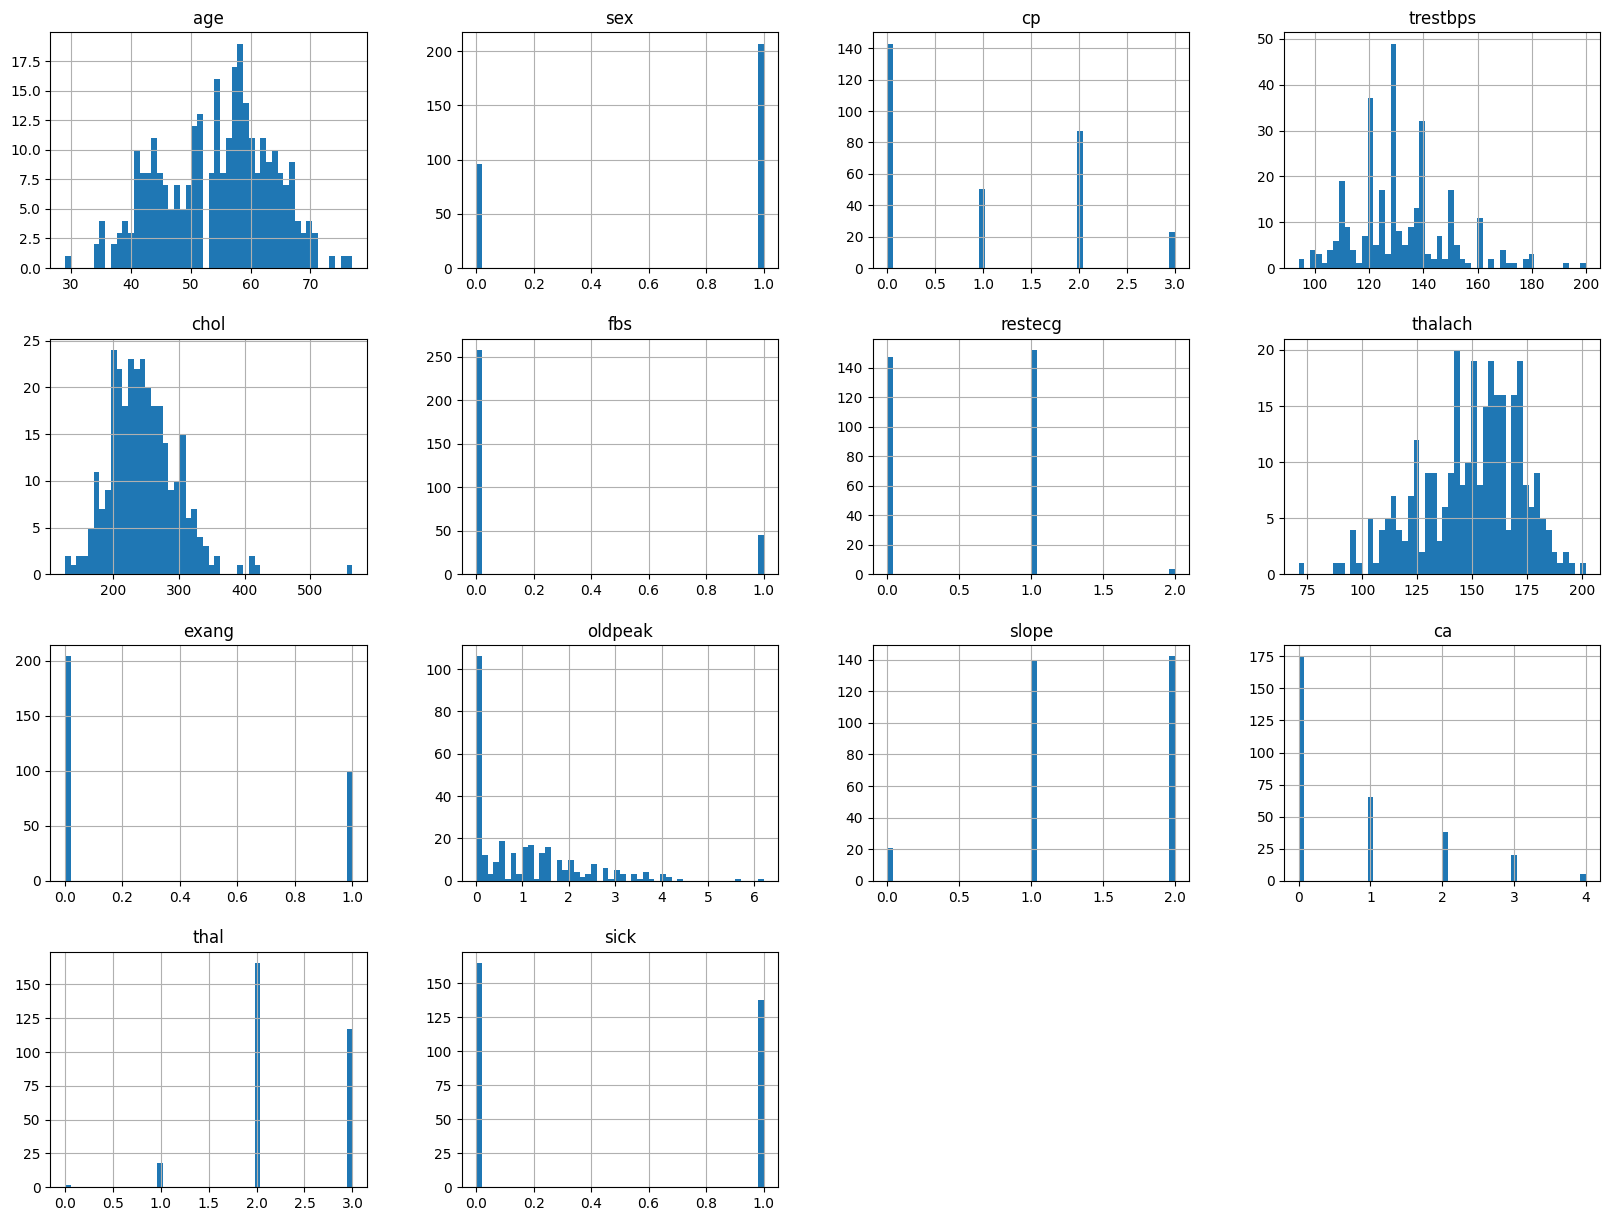

In [10]:
data_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

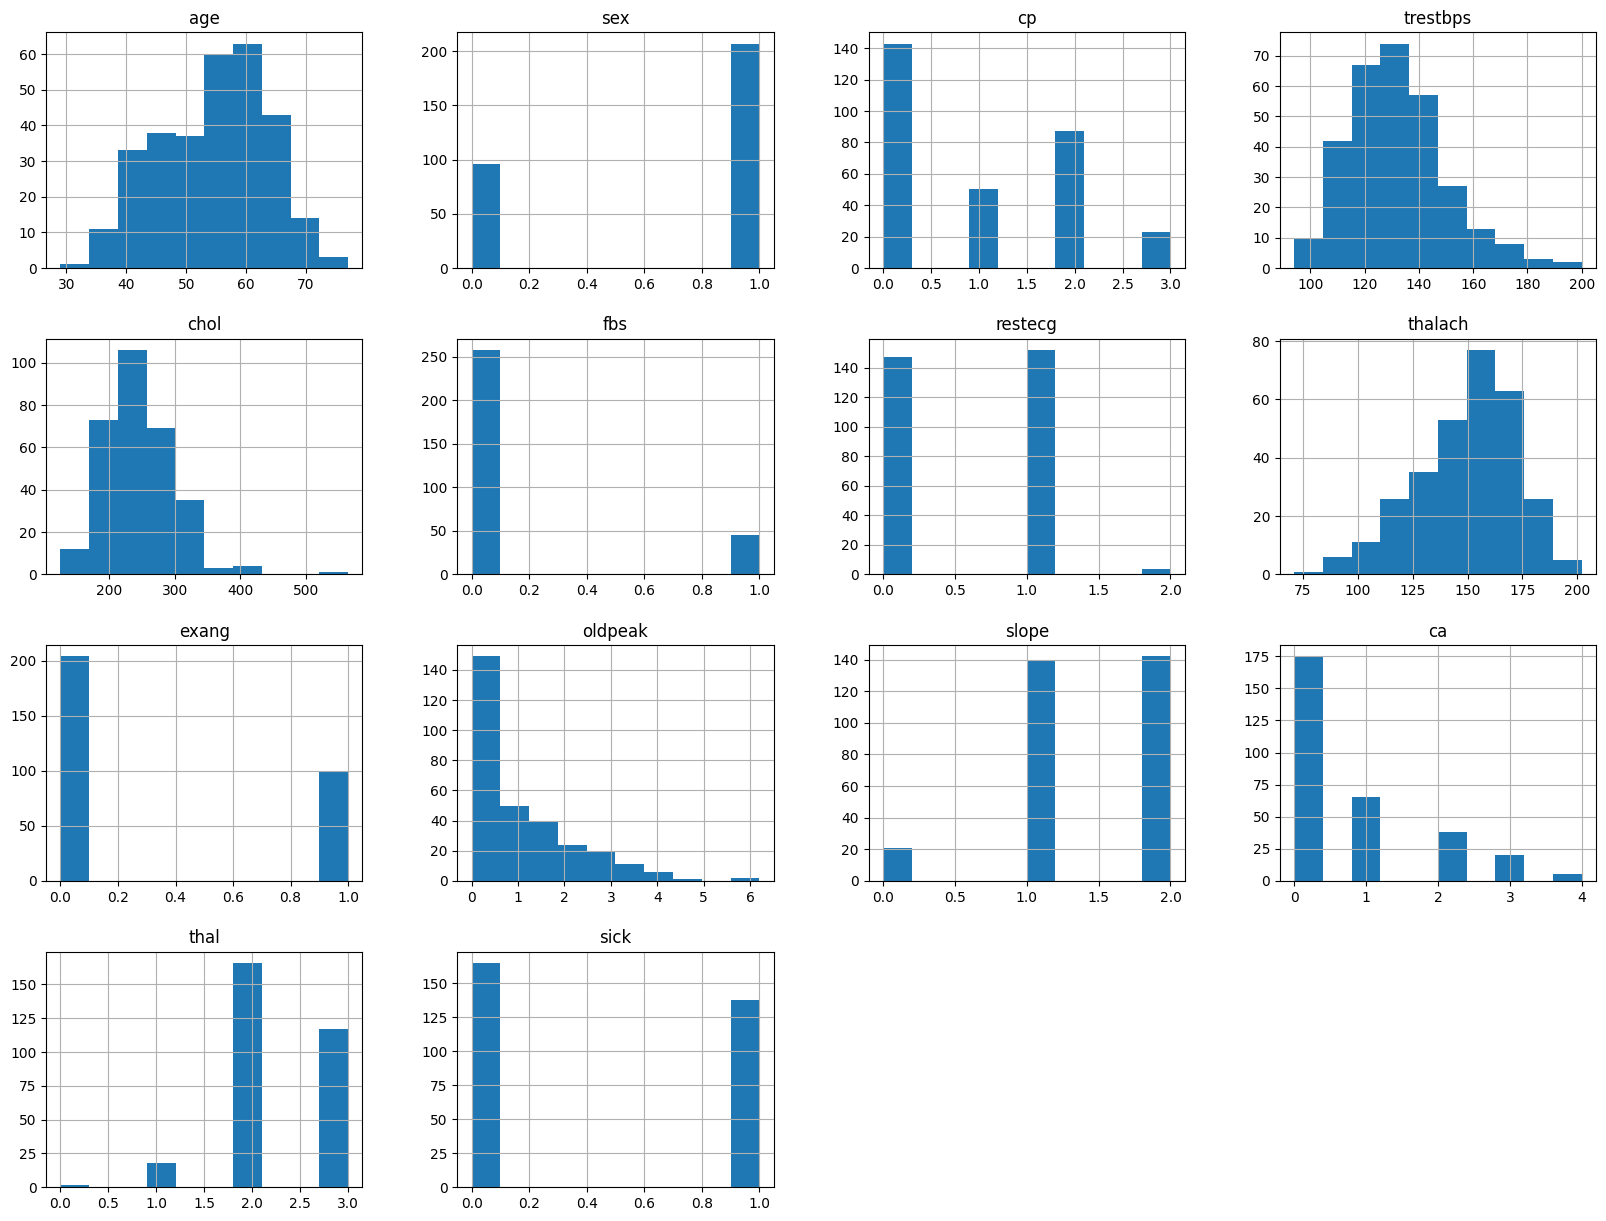

In [11]:
data_cleaned.hist(bins=10, figsize=(20,15))
plt.show()

### We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results:

sick
0    165
1    138
Name: count, dtype: int64

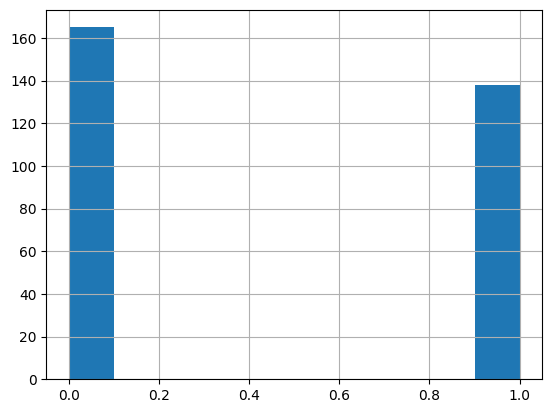

In [13]:
data_cleaned["sick"].hist()
data_cleaned["sick"].value_counts()

From the above counts, we can see that we have 165 healthy individuals and 138 sick individuals. From a preliminary look, these values seem reasonably balanced and allow us to proceed with our analysis.

### Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

<Axes: >

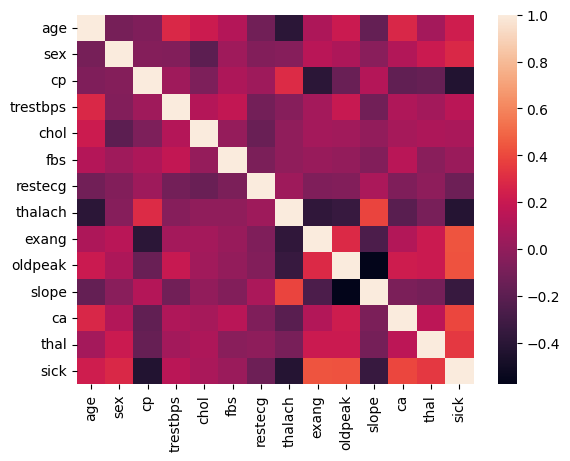

In [18]:
sns.heatmap(data_cleaned.corr())

From the heatmap, we can see most of the features have no correlation, while a couple are relatively strongly negatively and positively correlated. We comment on these features below.

We see that `trestbps`, which refers to the resting blood pressure, is positively correlated with `age` (which intuitively makes sense - as people age, their resting heart rate increases). We also see that `age` is correlated with `ca`, which refers to the number of major vessels colored by fluoroscopy and would which we would expect to increase with age. We see that `cp` is negatively correlated with `sick` - as we expect, folks who are asymptomatic for angina are very likely not sick. We also see that `cp` is negatively correlated with `exang`, which refers to Exercise Induced Angina, since we would expect folks who are asymptomatic for angina to not display any angina when exercising. We see that `thalach`, the maximum heart rate achieved, is correlated negatively with `sick`, meaning that sick individuals will display a lower maximum heart rate (which is generally considered unhealthy colloquially). We also see that `thalach` is negatively correlated with `exang` and `oldpeak`, which refers to the ST depression induced by exercise relative to rest, both of which for similar reasoning to that mentioned above. `slope`, the slope of the peak exercise, is positively correlated with `thalach`. Finally, we note that both `exang` and `oldpeak` are correlated positively with `sick`.

## Part 2. Prepare the 'Raw' Data and run a KNN Model

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Save the label column as a separate array and then drop it from the dataframe.

In [5]:
y = data_cleaned['sick']
data_x = data_cleaned.drop('sick', axis=1)

### First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split() method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, y, test_size=0.3, random_state=42)

In [7]:
print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (212, 13)
X test shape: (91, 13)
y train shape: (212,)
y test shape: (91,)


### We'll explore how not processing your data can impact model performance by using the K-Nearest Neighbor classifier. One thing to note was because KNN's rely on Euclidean distance, they are highly sensitive to the relative magnitude of different features. Let's see that in action! Implement a K-Nearest Neighbor algorithm on our raw data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [34]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

accuracy = 0.6593406593406593, precision = 0.631578947368421, recall = 0.5853658536585366, f1 = 0.6075949367088608


### Now implement a pipeline of your choice. You can opt to handle categoricals however you wish, however please scale your numeric features using standard scaler. Use the fit_transform() to fit this pipeline to your training data. and then transform() to apply that pipeline to your test data

Hint:
1. Create separate pipelines for numeric and categorical features with Pipeline() and then combining them with ColumnTransformer()
2. First, fit the full pipeline with the training data. Then, apply it to the test data as well.

### Pipeline:

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer

In [37]:
numeric_pipe = Pipeline([("scaling", StandardScaler(with_mean=False))])
categorical_pipe = Pipeline([("encoding", OneHotEncoder(drop='first')), ("scaling", StandardScaler(with_mean=False))])

In [38]:
pipeline = make_column_transformer((numeric_pipe, ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']), (categorical_pipe, ['cp','restecg', 'thal', 'slope']), ('passthrough', ['sex', 'fbs', 'exang']))

In [39]:
# Pipeline my test data
X_train_clean = pipeline.fit_transform(X_train)
X_test_clean = pipeline.transform(X_test)

### Now retrain your model and compare the accuracy metrics (Accuracy, Precision, Recall, F1 Score) with the raw and pipelined data.

In [40]:
# k-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()
neigh.fit(X_train_clean, y_train)

KNeighborsClassifier()

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = neigh.predict(X_test_clean)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

accuracy = 0.8021978021978022, precision = 0.7555555555555555, recall = 0.8292682926829268, f1 = 0.7906976744186046


Raw: accuracy = 0.6593406593406593, precision = 0.631578947368421, recall = 0.5853658536585366, f1 = 0.6075949367088608

Pipelined: accuracy = 0.8021978021978022, precision = 0.7555555555555555, recall = 0.8292682926829268, f1 = 0.7906976744186046

From the above metrics, we can see that in all aspects, our cleaned model performs significantly better. We specifically point to the much better recall score, which increased by more than 20 percentage points, indicating a much better prediction of actually sick individuals as being sick by the model. 

### Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 7, 9, 10, 20, and 50. Run your model for each value and report the accuracy for each. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [57]:
from sklearn.neighbors import KNeighborsClassifier


n_values = [1, 2, 3, 5, 7, 9, 10, 20, 50]

for val in n_values:

    neigh = KNeighborsClassifier(n_neighbors=val)
    neigh.fit(X_train_clean, y_train)
    y_pred = neigh.predict(X_test_clean)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"n = {val}, accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

n = 1, accuracy = 0.7032967032967034, precision = 0.6521739130434783, recall = 0.7317073170731707, f1 = 0.6896551724137931
n = 2, accuracy = 0.7692307692307693, precision = 0.8333333333333334, recall = 0.6097560975609756, f1 = 0.704225352112676
n = 3, accuracy = 0.7472527472527473, precision = 0.6875, recall = 0.8048780487804879, f1 = 0.7415730337078652
n = 5, accuracy = 0.8021978021978022, precision = 0.7555555555555555, recall = 0.8292682926829268, f1 = 0.7906976744186046
n = 7, accuracy = 0.8131868131868132, precision = 0.7727272727272727, recall = 0.8292682926829268, f1 = 0.8
n = 9, accuracy = 0.8131868131868132, precision = 0.7608695652173914, recall = 0.8536585365853658, f1 = 0.8045977011494253
n = 10, accuracy = 0.8681318681318682, precision = 0.8536585365853658, recall = 0.8536585365853658, f1 = 0.8536585365853658
n = 20, accuracy = 0.8351648351648352, precision = 0.7954545454545454, recall = 0.8536585365853658, f1 = 0.8235294117647058
n = 50, accuracy = 0.8681318681318682, pre

## Part 3. Additional Learning Methods

So we have a model that seems to work well. But let's see if we can do better! To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods

### Logistic Regression

Let's now try another classifier,one that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model.

### Report metrics for:
1.   Accuracy
2.   Precision
3.   Recall
4.   F1 Score



In [15]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0).fit(X_train_clean, y_train)

y_pred = lr.predict(X_test_clean)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

accuracy = 0.8241758241758241, precision = 0.7906976744186046, recall = 0.8292682926829268, f1 = 0.8095238095238095


### Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

Below is a quick description of how each metric is calculated:
* The accuracy measures the number of correct predictions (both correctly classified as sick or healthy) over the total number of predictions.
* The precision measures the number of correct predictions of sick divided by the total number of sick predictions (so is sensitive to false positives).
* The recall measures the number of correct predictions of sick divided by the total number of true sick individuals (so is sensitive to false negatives).
* The f1 score is calculated with the formula (2 * recall * precision) / (precision + recall)

Since each of these measures is sensitive to a particular type of misprediction, we may choose to view them holistically, or to focus on a particular metric. As an example, if we take the case of a preliminary test predicting cancer in patients, we may want to minimize false negatives (undetected cases) while allowing a reasonable increase in false positives (claiming cancer when it isn't present). In this example, we would likely use the recall score (since it does not decrease when we get a false positive, and increases when we have a true positive). As another example, we can consider a case where we are predicting good candidates for a single job listing - in this case, we want to minimize false positives, so would want to rely on the precision.

In summary, the accuracy should be used when we want to maximize the number of correct predictions. The precision should be used when we want to minimize/be sensitive to the number of false positives. Conversly, the recall should be used when we want to minimize/be sensitive to the number of false negatives. Finally, the f1 score should be used when we want to be sensitive to both the false positives and false negatives specifically. 

### Let's tweak a few settings. First let's set your solver to 'sag', your max_iter= 10, and set penalty = 'none' and rerun your model. Let's see how your results change!

In [16]:
# Logistic Regression
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0, max_iter=10, penalty=None, solver='sag').fit(X_train_clean, y_train)

y_pred = lr.predict(X_test_clean)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

accuracy = 0.8241758241758241, precision = 0.7906976744186046, recall = 0.8292682926829268, f1 = 0.8095238095238095


c:\Users\satye\OneDrive\Desktop\Files\Documents\2023-2024\CS M148\CSM148\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0, max_iter=10000, penalty=None, solver='sag').fit(X_train_clean, y_train)

y_pred = lr.predict(X_test_clean)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

accuracy = 0.8131868131868132, precision = 0.7727272727272727, recall = 0.8292682926829268, f1 = 0.8


### Explain what you changed, and why do you think that may have altered the outcome.

In order to get past the warning, we simply bumped up the `max_iter` parameter, allowing the model to run until it converged. We can see that this changed our metrics, making our model more generalizable. 

### Rerun your logistic classifier, but modify the penalty = 'l1', solver='liblinear' and again report the results.

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(random_state=0, penalty='l1', solver='liblinear').fit(X_train_clean, y_train)

y_pred = lr.predict(X_test_clean)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

accuracy = 0.8131868131868132, precision = 0.8, recall = 0.7804878048780488, f1 = 0.7901234567901234


### Explain what what the two solver approaches are, and why liblinear may have produced an improved outcome (but not always, and it's ok if your results show otherwise!).

We note that the `sag` solver stands for Stochastic Average Gradient, and is noted to run faster on larger data sets in the scikit-learn documentation. We also note that the `sag` solver suppport "only L2 regularization with primal formulation, or no regularization." `liblinear` by contrast is noted to to support both L1 and L2 regularization, but is not suited for multiclass classification problems (not applicable to our problem), and is well suited to datasets with high dimensionality.

We note that we would expect `sag` to perform better due to the relatively small size of our data set and the small number of input features we are plugging into our model.

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Implement a Support Vector Machine classifier on your pipelined data. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [25]:
# SVM
from sklearn.svm import SVC

svc = SVC(probability=True).fit(X_train_clean, y_train)

### Report the accuracy, precision, recall, F1 Score, of your model, but in addition, plot a Confusion Matrix of your model's performance

recommend using `from sklearn.metrics import ConfusionMatrixDisplay` for this one!


In [26]:
y_pred = svc.predict(X_test_clean)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

accuracy = 0.8241758241758241, precision = 0.7777777777777778, recall = 0.8536585365853658, f1 = 0.813953488372093


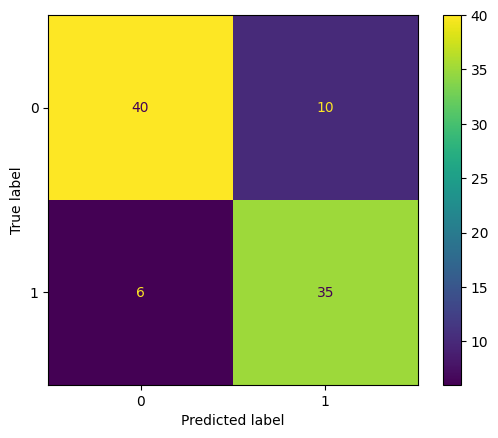

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

### Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

recommend using the `metrics.roc_curve` `metrics.auc` and `metrics.RocCurveDisplay` for this one!

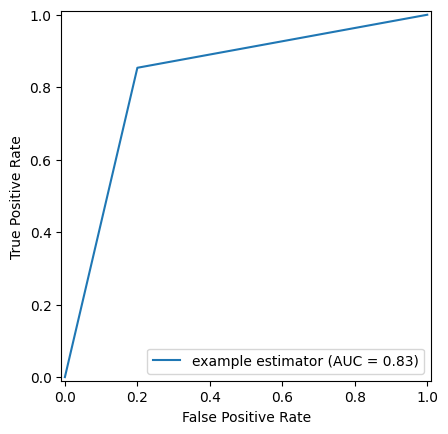

In [29]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

By reviewing content from lecture, we recall that the ROC, or Radio Operator Characteristics curve serves to aid in choosing a threshold value for a logistic regression model. Specifically, by plotting the true and false positive rate we can see how each responds to setting a target with the other for our given model. We expect the the results to follow a the general shape of `y = log(x)`, so our ROC generated has the expected shape. Finally, we note that a random predictor would be expected to follow the line `y = x`, so our model performs better than a random model.

(Following message left from original notebook). The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, so the areas under ROC curves are used to compare the usefulness of tests. Here we see a relatively low area under the curve indicating a poorly performing model.

### Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [30]:
# SVM
from sklearn.svm import SVC

svc = SVC(probability=True, kernel='linear').fit(X_train_clean, y_train)

In [31]:
y_pred = svc.predict(X_test_clean)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"accuracy = {accuracy}, precision = {precision}, recall = {recall}, f1 = {f1}")

accuracy = 0.8241758241758241, precision = 0.7906976744186046, recall = 0.8292682926829268, f1 = 0.8095238095238095


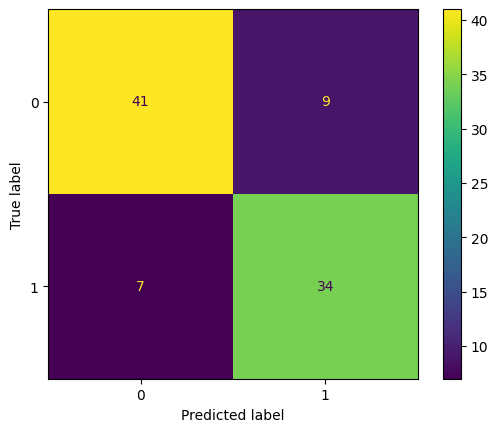

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

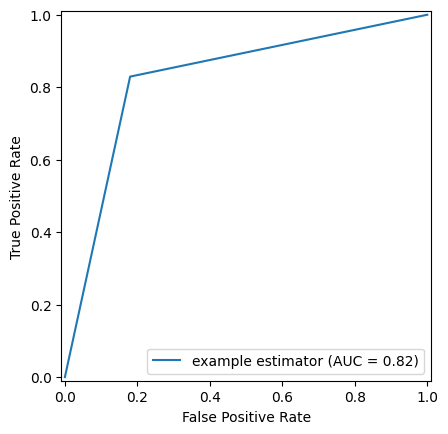

In [33]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

### Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

Although the results are reasonably similar, we see that our predictions have shifted around slightly. We note that for the default kernel, we have a slightly higher AUC than for a linear kernel. Investigating the difference between the two kernels, we understand that a `linear` kernel is often less computationally intensive (so more appropriate for larger datasets), while the default `rbf` kernel will be more expensive, but can capture non linear trends in data. As such, it's unsuprising we see a slight performance boost in the model with the default kernel.

### Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

Although logistic regression and linear SVM try to classify points with a linear decision boundary, we find that SVM will generally perform better. Specifically, we point to linear SVM's optimization algorithm is geometric (rather than the statistics based approach of linear regression), which minimizes the maximum margin to the boundary points (the support vectors) between two classes. This approach is less sensitive to outliers in the data, and generally considered to be less sensitive to overfitting of data - but may not represent the data as closely as a linear regression model can.

# Printing Jupyter notebook to PDF

https://piazza.com/class/lr48piooit63hi/post/47 by Steven Bash

It may take a few minutes to run

In [43]:
def colab2pdf():
  ENABLE=True # @param {type:"boolean"}
  if ENABLE:
    !apt-get install librsvg2-bin
    import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
    locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
    NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
    TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
    NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
    warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
    with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
  if not pathlib.Path("/usr/local/bin/quarto").exists():
    !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
    with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
    !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
    google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


ModuleNotFoundError: No module named 'requests'